In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sortedData = []

for i in range(30):
    sortedData.append([])

with open('D:\\vas\\build\\load.csv','rt')as f:
  data = csv.reader(f)
  for row in data:
        if not row[0] == "id":
            sortedData[int(row[0])].append(int(row[1]))

In [3]:
print(len(sortedData[27]))
print(sortedData[27][:100])

1394
[10, 10, 20, 10, 20, 40, 30, 40, 40, 20, 30, 10, 30, 0, 20, 30, 20, 10, 30, 20, 40, 10, 0, 40, 40, 20, 10, 20, 40, 20, 10, 50, 60, 30, 20, 40, 10, 20, 50, 20, 30, 40, 40, 30, 50, 40, 60, 60, 10, 30, 20, 40, 50, 10, 50, 20, 30, 40, 20, 30, 20, 20, 20, 50, 20, 40, 20, 30, 0, 30, 30, 30, 20, 60, 20, 20, 20, 30, 10, 30, 10, 30, 40, 20, 20, 0, 10, 50, 30, 20, 10, 20, 20, 20, 0, 30, 0, 20, 20, 20]


In [4]:
def movingaverage(interval, window_size):
  window = np.ones(int(window_size))/float(window_size)
  return np.convolve(interval, window, 'same')
def avg(lst):
    return sum(lst) / len(lst)

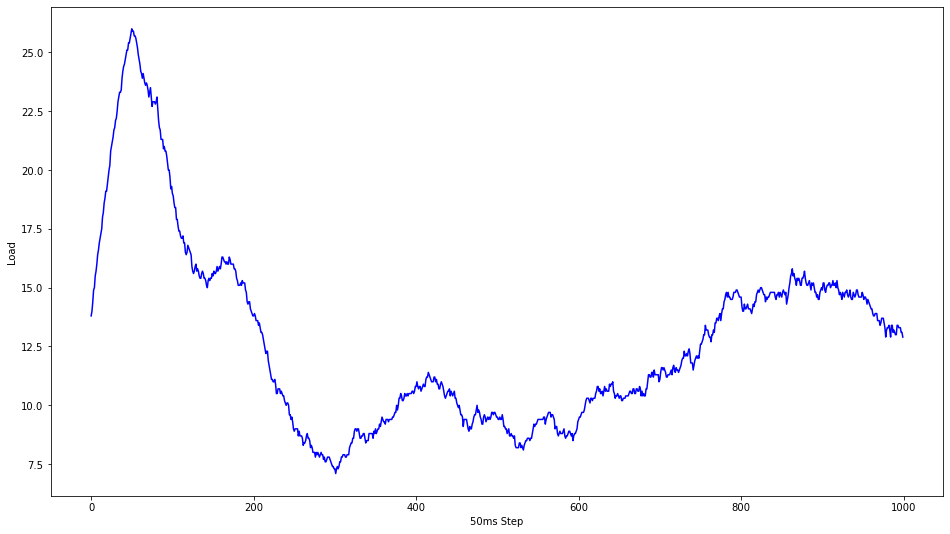

In [5]:
windowSize = 100
window = np.ones(int(windowSize))/float(windowSize)
movingAverage = np.convolve(sortedData[27], window, 'same')

plt.rc('figure', figsize=(16, 9))
plt.plot(movingAverage[:1000], "b", markersize=1)
plt.ylabel('Load')
plt.xlabel('50ms Step')
plt.show()

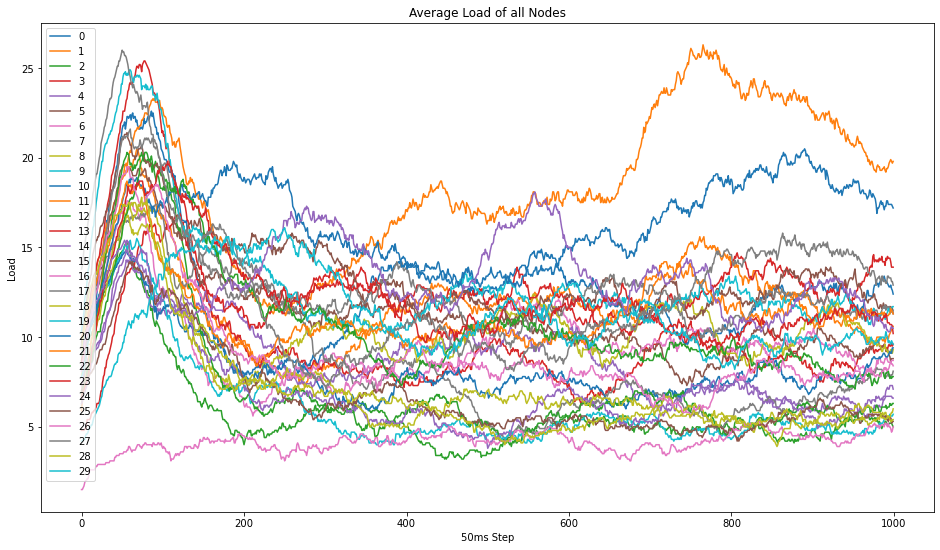

In [6]:
windowSize = 10
window = np.ones(int(windowSize))/float(windowSize)
movingAverage = np.convolve(sortedData[27], window, 'same')

plt.rc('figure', figsize=(16, 9))
fig, ax = plt.subplots()
    
for i in range(30):
    y_av = movingaverage(sortedData[i], 100)
    ax.plot(y_av[:1000], linestyle='-', label=i)

ax.legend()
plt.title("Average Load of all Nodes")
plt.xlabel('50ms Step')
plt.ylabel('Load')
plt.savefig('AverageLoadOverTime.png')
plt.show()

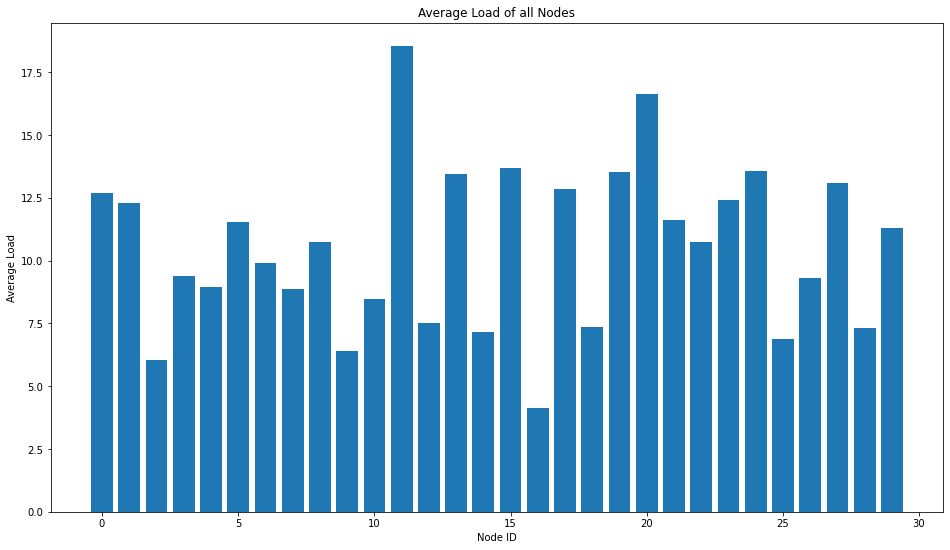

In [7]:
averages = []

for i in range(30):
    averages.append(avg(sortedData[i][:1000]))

plt.title("Average Load of all Nodes")
plt.rc('figure', figsize=(16, 9))
plt.bar(range(30),averages)
plt.ylabel('Average Load')
plt.xlabel('Node ID')
plt.savefig('AverageLoad.png')
plt.show()

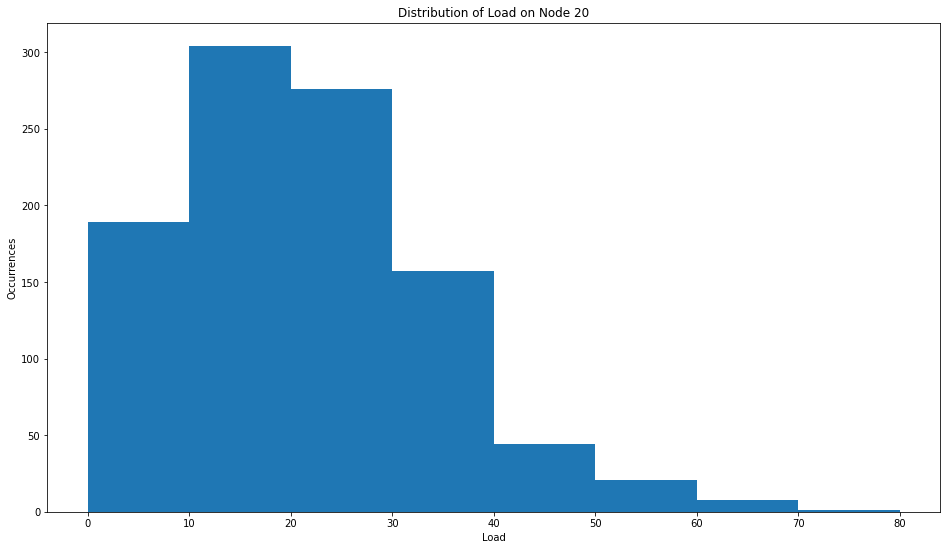

In [8]:
plt.rc('figure', figsize=(16, 9))
plt.title("Distribution of Load on Node 20")
plt.hist(sortedData[20][:1000], bins=[0,10,20,30,40,50,60,70,80])
plt.ylabel('Occurrences')
plt.xlabel('Load')
plt.savefig('HistogramLoad20.png')
plt.show()